### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

#### Confirmed positive cases by COVID19 in Ontario
source: https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario
This dataset compiles daily snapshots of publicly reported data on 2019 Novel Coronavirus (COVID-19) testing in Ontario.

Data includes:
- approximation of onset date
- age group
- patient gender
- case acquisition information
- patient outcome
- reporting Public Health Unit (PHU)
- postal code, website, longitude, and latitude of PHU

In [2]:
confirmed_case = pd.read_csv('Confirmed positive cases by COVID19 in Ontario/conposcovidloc.csv')

In [3]:
confirmed_case.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,MISSING INFORMATION,Resolved,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
1,2,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,CC,Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
2,3,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
3,4,2019-12-18,2021-12-20,2021-12-20,2019-12-18,30s,MALE,MISSING INFORMATION,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2020-01-01,2020-04-24,2020-04-24,2020-04-23,80s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815


Extract a list of public health units from the above dataset

In [4]:
phu_list = confirmed_case[['Reporting_PHU_ID','Reporting_PHU','Reporting_PHU_City']].drop_duplicates()
phu_list = phu_list.reset_index().drop(columns=['index'])
phu_list

,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City
0,2243,"Leeds, Grenville and Lanark District Health Unit",Brockville
1,2260,Simcoe Muskoka District Health Unit,Barrie
2,4913,Southwestern Public Health,St. Thomas
3,2270,York Region Public Health Services,Newmarket
4,2234,Haldimand-Norfolk Health Unit,Simcoe
5,2265,"Region of Waterloo, Public Health",Waterloo
6,2253,Peel Public Health,Mississauga
7,2258,Eastern Ontario Health Unit,Cornwall
8,3895,Toronto Public Health,Toronto
9,2244,Middlesex-London Health Unit,London


In [5]:
#phu_list.to_csv('phu_list.csv', index = False)

Summarize daily number of cases by public health unit

In [6]:
case_summary_by_Phu = confirmed_case[['Case_Reported_Date','Reporting_PHU_ID','Reporting_PHU']].groupby(['Case_Reported_Date','Reporting_PHU_ID','Reporting_PHU'])['Case_Reported_Date'].count().reset_index(name='Number_of_Cases')
case_summary_by_Phu

,Case_Reported_Date,Reporting_PHU_ID,Reporting_PHU,Number_of_Cases
0,2020-01-23,3895,Toronto Public Health,2
1,2020-01-24,2244,Middlesex-London Health Unit,1
2,2020-02-21,3895,Toronto Public Health,1
3,2020-02-25,3895,Toronto Public Health,1
4,2020-02-26,3895,Toronto Public Health,1
...,...,...,...,...
20476,2022-04-03,2268,Windsor-Essex County Health Unit,34
20477,2022-04-03,2270,York Region Public Health Services,74
20478,2022-04-03,3895,Toronto Public Health,218
20479,2022-04-03,4913,Southwestern Public Health,24


Checked against the daily number released by federal and they don't match. 
I'm also not able to match it with the following data, cases_by_status, so this data, case_summary_by_Phu, will not be used.

In [7]:
#case_summary_by_Phu.to_csv('case_summary_by_Phu.csv',index=False)

#### Status of COVID-19 cases in Ontario by Public Health Unit (PHU)
source: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario-by-public-health-unit-phu
This dataset compiles daily snapshots of publicly reported data on 2019 Novel Coronavirus (COVID-19) testing in Ontario.

Data includes:
- reporting date
- reporting Public Health Unit (PHU)
- case outcomes (active, resolutions and deaths)

The methodology used to count COVID-19 deaths has changed to exclude deaths not caused by COVID. This impacts data captured in the columns “RESOLVED_CASES” and “DEATHS” starting with the file posted on March 11, 2022. Two new columns have been added to the file “ARCHIVED_RESOLVED_CASES” and “ARCHIVED_DEATHS” which represent the data that were posted publicly prior to the methodological change.

In [8]:
cases_by_status = pd.read_csv('Status of COVID-19 cases in Ontario by Public Health Unit/cases_by_status_and_phu.csv')
cases_by_status.head()

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,ARCHIVED_RESOLVED_CASES,ARCHIVED_DEATHS
0,2020-04-01,ALGOMA DISTRICT,2226.0,4,1,0,1.0,0.0
1,2020-04-01,BRANT COUNTY,2227.0,10,5,0,5.0,0.0
2,2020-04-01,CHATHAM-KENT,2240.0,6,2,0,2.0,0.0
3,2020-04-01,CITY OF HAMILTON,2237.0,54,48,0,48.0,0.0
4,2020-04-01,CITY OF OTTAWA,2251.0,136,55,0,55.0,0.0


As noted in data description, archived_resolved_cases and archived_deaths columns are old data before methodology change.
We can remove them.

In [9]:
cases_by_status = cases_by_status.iloc[:,:-2]
cases_by_status.head()

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
0,2020-04-01,ALGOMA DISTRICT,2226.0,4,1,0
1,2020-04-01,BRANT COUNTY,2227.0,10,5,0
2,2020-04-01,CHATHAM-KENT,2240.0,6,2,0
3,2020-04-01,CITY OF HAMILTON,2237.0,54,48,0
4,2020-04-01,CITY OF OTTAWA,2251.0,136,55,0


Calculate cumulative total number of cases and case fatality rate (death/# total cases)

And this total number of cases matches with daily released numbers by federal

In [10]:
cases_by_status['TOTAL_CASES'] = cases_by_status.iloc[:,3:5].sum(axis=1)
cases_by_status['CASE_FATALITY_RATE'] = cases_by_status['DEATHS']/cases_by_status['TOTAL_CASES']
cases_by_status

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,TOTAL_CASES,CASE_FATALITY_RATE
0,2020-04-01,ALGOMA DISTRICT,2226.0,4,1,0,5,0.000000
1,2020-04-01,BRANT COUNTY,2227.0,10,5,0,15,0.000000
2,2020-04-01,CHATHAM-KENT,2240.0,6,2,0,8,0.000000
3,2020-04-01,CITY OF HAMILTON,2237.0,54,48,0,102,0.000000
4,2020-04-01,CITY OF OTTAWA,2251.0,136,55,0,191,0.000000
...,...,...,...,...,...,...,...,...
24951,2022-04-04,TORONTO,3895.0,4911,283519,4113,288430,0.014260
24952,2022-04-04,WATERLOO REGION,2265.0,914,41270,402,42184,0.009530
24953,2022-04-04,WELLINGTON-DUFFERIN-GUELPH,2266.0,634,19063,159,19697,0.008072
24954,2022-04-04,WINDSOR-ESSEX COUNTY,2268.0,649,38496,595,39145,0.015200


In [11]:
#cases_by_status.to_csv('cases_by_status.csv', index = False)

#### Status of COVID-19 cases in Ontario
source: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

Data includes:
- change in number of cases from previous day by Public Health Unit (PHU)


In [12]:
daily_cases_by_phu = pd.read_csv('Status of COVID-19 cases in Ontario/daily_change_in_cases_by_phu.csv')
daily_cases_by_phu.head()

,Date,Algoma_District,Brant_County,Chatham_Kent,Durham_Region,Eastern_Ontario,Grey_Bruce,Haldimand_Norfolk,Haliburton_Kawartha_Pine_Ridge,Halton_Region,...,Simcoe_Muskoka_District,Southwestern,Sudbury_and_District,Thunder_Bay_District,Timiskaming,Toronto,Wellington_Dufferin_Guelph,Windsor_Essex_County,York_Region,Total
0,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-25,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,17.0,1.0,1.0,5.0,46
2,2020-03-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,21.0,1.0,2.0,5.0,69
3,2020-03-27,0.0,0.0,0.0,5.0,0.0,1.0,0.0,14.0,1.0,...,4.0,2.0,1.0,0.0,0.0,22.0,0.0,0.0,34.0,124
4,2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
daily_cases_by_phu = daily_cases_by_phu.iloc[:,:-1] # remove Total column
daily_cases_by_phu = daily_cases_by_phu.melt(id_vars = ['Date'],var_name = 'PHU', value_name = 'Daily_New_Cases')

daily_cases_by_phu

,Date,PHU,Daily_New_Cases
0,2020-03-24,Algoma_District,NaN
1,2020-03-25,Algoma_District,0.0
2,2020-03-26,Algoma_District,0.0
3,2020-03-27,Algoma_District,0.0
4,2020-03-28,Algoma_District,NaN
...,...,...,...
25223,2022-03-31,York_Region,170.0
25224,2022-04-01,York_Region,165.0
25225,2022-04-02,York_Region,177.0
25226,2022-04-03,York_Region,183.0


fill null with 0 and convert Daily_New_Cases column to numeric

In [14]:
daily_cases_by_phu = daily_cases_by_phu.fillna(0)
daily_cases_by_phu = daily_cases_by_phu.astype({'Daily_New_Cases':'int'})

In [15]:
daily_cases_by_phu

,Date,PHU,Daily_New_Cases
0,2020-03-24,Algoma_District,0
1,2020-03-25,Algoma_District,0
2,2020-03-26,Algoma_District,0
3,2020-03-27,Algoma_District,0
4,2020-03-28,Algoma_District,0
...,...,...,...
25223,2022-03-31,York_Region,170
25224,2022-04-01,York_Region,165
25225,2022-04-02,York_Region,177
25226,2022-04-03,York_Region,183


In [16]:
#daily_cases_by_phu.to_csv('daily_cases_by_phu.csv',index=False)

#### Long-Term Care Home COVID-19 Data
source: https://data.ontario.ca/dataset/long-term-care-home-covid-19-data

This dataset compiles daily snapshots of publicly reported data on 2019 Novel Coronavirus (COVID-19) testing in Ontario in Long-Term (LTC) homes.
Summary data is aggregated to the provincial level. Reports fewer than 5 are indicated with <5 to maintain the privacy of individuals.

Data includes:
- LTC home COVID-19 summary data
- LTC homes with an active COVID-19 outbreak
- LTC homes no longer in a COVID-19 outbreak
- LTC home COVID-19 summary data by Public Health Unit (PHU)
- LTC home COVID-19 staff vaccination rates

As of April 7, 2021, an outbreak is defined as two or more lab-confirmed COVID-19 cases in residents, staff or other visitors in a home, with an epidemiological link, within a 14-day period, where at least one case could have reasonably acquired their infection in the LTC home. Previously, the definition required one or more lab-confirmed COVID-19 cases in a resident or staff in the long-term care home.

March 12 & 13: Due to technical difficulties, data is not available.

##### Active LTC outbreak data
- Beds: Total number of licensed beds in the Long-Term Care (LTC) home.

- Total_LTC_Resident_Cases: Current number of residents with confirmed active cases of COVID-19 at a Long-Term Care (LTC) home as measured on "Report_Data_Extracted" date.

- Total_LTC_Resident_Deaths:Cumulative number of COVID-19 related resident deaths in a Long- Term Care home as measured on the "Report_Data_Extracted" date.

- Total_LTC_HCW_Cases: Current number of staff with confirmed active cases of COVID-19 at a Long-Term Care (LTC) home as measured on "Report_Data_Extracted" date.

In [17]:
active_ltc_outbreak = pd.read_csv('Long-Term Care Home COVID-19 Data/activeltcoutbreak.csv',encoding = 'unicode_escape')
active_ltc_outbreak.head()

,Report_Data_Extracted,PHU_Num,PHU,LTC_Home,LTCH_Num,City,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases
0,4/24/2020,2246,Niagara,"Albright Gardens Homes, Incorporated",2983,Beamsville,231.0,<5,0,<5
1,4/24/2020,2243,"Leeds,Grenville,Lanark",Almonte Country Haven,2692,Almonte,82.0,44,25,17
2,4/24/2020,3895,Toronto,Altamont Care Community,956,Scarborough,159.0,125,32,45
3,4/24/2020,2227,Brant,Anson Place Care Centre,2786,Hagersville,61.0,28,23,33
4,4/24/2020,2230,Durham,Bay Ridges,2895,Pickering,124.0,0,0,<5


##### LTC home immunization data
This LTC Immunization data is reported on a monthly basis, we will apply each month's number of a home to everyday of the month in later step.

In [18]:
ltc_immunization = pd.read_csv('Long-Term Care Home COVID-19 Data/ltc_immunization_data.csv')
ltc_immunization.head()

,Date_Collected,LTC_Home,LTC_Home_Number,City,PHU,1st_dose_percentage_staff_vaccination_rate,2nd_dose_percentage_staff_vaccination_rate
0,2021-08-31,Algoma Manor Nursing Home,3041,Thessalon,ALGOMA,0.92,0.91
1,2021-08-31,Cedarwood Lodge,7093,Sault Ste. Marie,ALGOMA,0.95,0.95
2,2021-08-31,Extendicare Maple View of Sault Ste. Marie,3043,Sault Ste. Marie,ALGOMA,0.74,0.68
3,2021-08-31,Extendicare Van Daele,2609,Sault Ste. Marie,ALGOMA,0.90,0.88
4,2021-08-31,F. J. Davey Home,2936,Sault Ste. Marie,ALGOMA,0.87,0.74


##### LTC summary data
will not use the following dataset because it's provincial level, no breakdown by phu or ltc home

In [19]:

ltc_summary = pd.read_csv('Long-Term Care Home COVID-19 Data/ltccovidsummary.csv')
ltc_summary.head()

,Report_Data_Extracted,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths,Active_Outbreaks_with_No_Resident_Cases
0,2020-04-24,145,31,2455,1120,625,1,NaN
1,2020-04-25,147,31,2520,1161,654,1,NaN
2,2020-04-26,150,32,2523,1187,671,1,NaN
3,2020-04-27,154,34,2491,1205,705,1,NaN
4,2020-04-28,159,34,2632,1361,775,1,NaN


##### LTC summary by PHU
- Confirmed_Active_LTC_Resident_Cases: Current number of residents with confirmed active cases of COVID-19 at a Long-Term Care (LTC) home as measured on "Report_Data_Extracted" date.

- Total_LTC_Resident_Deaths: Number of active Cumulative COVID-19 positive cases among residents of the Long-Term Care home as measured on "Report_Data_Extracted" date.

- Total_LTC_HCW_Deaths: Number of active COVID-19 positive cases among staff associated with the Long-Term Care home as measured on "Report_Data_Extracted" date.

In [20]:
ltc_summary_by_phu = pd.read_csv('Long-Term Care Home COVID-19 Data/ltccovidsummarybyphu.csv')
ltc_summary_by_phu.head()

,Report_Data_Extracted,PHU_Num,PHU,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths
0,2020-04-24,2226,Algoma,0,0,0,0,0,0
1,2020-04-24,2227,Brant,2,0,28,34,23,0
2,2020-04-24,2230,Durham,7,1,243,88,71,0
3,2020-04-24,2233,Grey-Bruce,2,0,22,7,0,0
4,2020-04-24,2234,Haldimand-Norfolk,0,1,0,0,0,0


##### Resolved LTC outbreak data
will not use this dataset because the number of death stays the same as 
the last day of outbreak in active outbreak dataset
until new outbreak starts and outbreak data will be tracked in active outbreak dataset

In [21]:
resolved_ltc_outbreak = pd.read_csv('Long-Term Care Home COVID-19 Data/resolvedltc.csv')
resolved_ltc_outbreak.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Report_Data_Extracted,PHU_Num,PHU,LTC_Home,City,Beds,Total_LTC_Resident_Deaths
0,2020-04-24,2236,Halton,Allendale,Milton,200,0
1,2020-04-24,2265,Waterloo,Chartwell Westmount Long Term Care Residence,Kitchener,160,0
2,2020-04-24,2244,Middlesex-London,Chelsey Park,London,247,0
3,2020-04-24,3895,Toronto,Chester Village,Toronto,203,0
4,2020-04-24,2237,Hamilton,Clarion Nursing Home,Stoney Creek,100,0


#### COVID-19 Vaccine Data in Ontario
Source: https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario

In [22]:
# no use
cases_by_age_vac_status = pd.read_csv('COVID-19 Vaccine Data in Ontario/cases_by_age_vac_status.csv')
cases_by_age_vac_status 

,date,agegroup,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_notfull_vac_rate_per100K,cases_full_vac_rate_per100K,cases_boost_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_notfull_vac_rate_7ma,cases_full_vac_rate_7ma,cases_boost_vac_rate_7ma
0,2021-09-13,0-11yrs,6.24,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-13,12-17yrs,13.11,1.92,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-13,18-39yrs,13.51,6.70,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-13,40-59yrs,10.91,6.04,NaN,1.41,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-13,60-79yrs,9.62,0.00,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
463,2022-04-04,18-39yrs,NaN,NaN,10.02,10.79,23.80,NaN,NaN,12.68,16.58,32.81
464,2022-04-04,40-59yrs,NaN,NaN,8.62,9.94,20.15,NaN,NaN,10.37,15.74,24.65
465,2022-04-04,5-11yrs,NaN,NaN,9.39,16.13,0.00,NaN,NaN,10.22,15.69,0.00
466,2022-04-04,60+,NaN,NaN,44.38,10.71,11.05,NaN,NaN,42.43,11.62,12.98


In [23]:
# no use
vaccine_doses = pd.read_csv('COVID-19 Vaccine Data in Ontario/vaccine_doses.csv')
vaccine_doses

,report_date,previous_day_total_doses_administered,previous_day_at_least_one,previous_day_fully_vaccinated,previous_day_3doses,total_doses_administered,total_individuals_at_least_one,total_individuals_partially_vaccinated,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated,total_individuals_3doses
0,2020-12-24,NaN,NaN,NaN,NaN,10756,NaN,NaN,NaN,NaN,NaN
1,2020-12-30,7847.0,NaN,NaN,NaN,18603,NaN,NaN,NaN,NaN,NaN
2,2020-12-31,4899.0,NaN,NaN,NaN,23502,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,5385.0,NaN,NaN,NaN,28887,NaN,NaN,NaN,NaN,NaN
4,2021-01-02,4304.0,NaN,NaN,NaN,33191,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
457,2022-03-31,9457.0,1027.0,2311.0,4664.0,32064229,12605733.0,488051.0,NaN,12117682.0,7179377.0
458,2022-04-01,9618.0,1048.0,2173.0,4948.0,32073847,12606781.0,486926.0,NaN,12119855.0,7184325.0
459,2022-04-02,10898.0,1151.0,2438.0,5652.0,32084745,12607932.0,485639.0,NaN,12122293.0,7189977.0
460,2022-04-03,9003.0,935.0,2581.0,4973.0,32093748,12608867.0,483993.0,NaN,12124874.0,7194950.0


In [24]:
# no use
vaccines_by_age = pd.read_csv('COVID-19 Vaccine Data in Ontario/vaccines_by_age.csv')
vaccines_by_age

,Date,Agegroup,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,2020-12-16,12-17yrs,0,0.0,NaN,NaN,951519,0.0000,0.0000,NaN
1,2020-12-16,18-29yrs,45,0.0,NaN,NaN,2455535,0.0000,0.0000,NaN
2,2020-12-16,30-39yrs,66,0.0,NaN,NaN,2056059,0.0000,0.0000,NaN
3,2020-12-16,40-49yrs,98,0.0,NaN,NaN,1876583,0.0000,0.0000,NaN
4,2020-12-16,50-59yrs,141,0.0,NaN,NaN,2060934,0.0000,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...
5470,2022-04-04,80+,675151,NaN,660002.0,581204.0,655835,0.9999,0.9999,0.8862
5471,2022-04-04,Adults_18plus,11142494,NaN,10876013.0,7060447.0,11971129,0.9308,0.9085,0.5898
5472,2022-04-04,Ontario_12plus,12006637,NaN,11763154.0,7197165.0,12932471,0.9284,0.9096,0.5565
5473,2022-04-04,Ontario_5plus,12607291,NaN,12124914.0,7197256.0,14010998,0.8998,0.8654,0.5137


In [25]:
# We can get vaccination rate by phu from this dataset
vaccines_by_age_phu = pd.read_csv('COVID-19 Vaccine Data in Ontario/vaccines_by_age_phu.csv')
vaccines_by_age_phu.head()

,Date,PHU ID,PHU name,Agegroup,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,2021-07-26,2226,ALGOMA DISTRICT,12-17yrs,3843.0,1890.0,NaN,NaN,6504,0.5909,0.2906,NaN
1,2021-07-26,2227,BRANT COUNTY,12-17yrs,6306.0,3567.0,NaN,NaN,10734,0.5875,0.3323,NaN
2,2021-07-26,2230,DURHAM REGION,12-17yrs,34025.0,16953.0,NaN,NaN,51038,0.6667,0.3322,NaN
3,2021-07-26,2233,GREY BRUCE,12-17yrs,5533.0,3627.0,NaN,NaN,10179,0.5436,0.3563,NaN
4,2021-07-26,2234,HALDIMAND-NORFOLK,12-17yrs,3125.0,1711.0,NaN,NaN,7138,0.4378,0.2397,NaN


In [26]:
vaccines_by_phu = vaccines_by_age_phu.iloc[:,:-3]
vaccines_by_phu.head()

,Date,PHU ID,PHU name,Agegroup,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Total population
0,2021-07-26,2226,ALGOMA DISTRICT,12-17yrs,3843.0,1890.0,NaN,NaN,6504
1,2021-07-26,2227,BRANT COUNTY,12-17yrs,6306.0,3567.0,NaN,NaN,10734
2,2021-07-26,2230,DURHAM REGION,12-17yrs,34025.0,16953.0,NaN,NaN,51038
3,2021-07-26,2233,GREY BRUCE,12-17yrs,5533.0,3627.0,NaN,NaN,10179
4,2021-07-26,2234,HALDIMAND-NORFOLK,12-17yrs,3125.0,1711.0,NaN,NaN,7138


In [27]:
vaccines_by_phu = vaccines_by_phu.groupby(['Date','PHU ID','PHU name']).sum()
vaccines_by_phu['Percent_at_least_one_dose'] = vaccines_by_phu['At least one dose_cumulative']/vaccines_by_phu['Total population']
vaccines_by_phu['Percent_fully_vaccinated'] = (vaccines_by_phu['Second_dose_cumulative']+vaccines_by_phu['fully_vaccinated_cumulative'])/vaccines_by_phu['Total population']
vaccines_by_phu['Percent_3doses'] = vaccines_by_phu['third_dose_cumulative']/vaccines_by_phu['Total population']

In [28]:
vaccines_by_phu = vaccines_by_phu.reset_index()

In [29]:
#vaccines_by_phu.to_csv('vaccines_by_phu.csv',index = False)
vaccines_by_phu

,Date,PHU ID,PHU name,At least one dose_cumulative,Second_dose_cumulative,fully_vaccinated_cumulative,third_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,2021-07-26,2226,ALGOMA DISTRICT,241457.0,199812.0,0.0,0.0,297748,0.810944,0.671078,0.000000
1,2021-07-26,2227,BRANT COUNTY,315645.0,261913.0,0.0,0.0,392107,0.804997,0.667963,0.000000
2,2021-07-26,2230,DURHAM REGION,1469448.0,1217566.0,0.0,0.0,1800877,0.815962,0.676096,0.000000
3,2021-07-26,2233,GREY BRUCE,348138.0,307082.0,0.0,0.0,437001,0.796653,0.702703,0.000000
4,2021-07-26,2234,HALDIMAND-NORFOLK,216273.0,185410.0,0.0,0.0,293681,0.736421,0.631331,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8850,2022-04-04,2270,YORK REGION,3902746.0,0.0,3801977.0,2352508.0,4297983,0.908041,0.884596,0.547352
8851,2022-04-04,3895,TORONTO,9990197.0,0.0,9672536.0,5944808.0,10875275,0.918616,0.889406,0.546635
8852,2022-04-04,4913,SOUTHWESTERN,662220.0,0.0,647615.0,395163.0,772067,0.857723,0.838807,0.511825
8853,2022-04-04,5183,HURON PERTH,453724.0,0.0,442459.0,295633.0,517866,0.876142,0.854389,0.570868


### Prepare dataset for machine learning
Combine LTC home outbreak data, PHU COVID19 data, and immunization data

Limited by LTC immunization dataset which only has data from August to December 2021, we will use data in this timeframe to conduct the analysis.

#### Step 1 - prepare ltc dataset which includes ltc home outbreak data and immunization data

In [30]:
print(ltc_immunization.Date_Collected.unique())
ltc_immunization.head()

['2021-08-31' '2021-09-30' '2021-10-31' '2021-11-30' '2021-12-31']


,Date_Collected,LTC_Home,LTC_Home_Number,City,PHU,1st_dose_percentage_staff_vaccination_rate,2nd_dose_percentage_staff_vaccination_rate
0,2021-08-31,Algoma Manor Nursing Home,3041,Thessalon,ALGOMA,0.92,0.91
1,2021-08-31,Cedarwood Lodge,7093,Sault Ste. Marie,ALGOMA,0.95,0.95
2,2021-08-31,Extendicare Maple View of Sault Ste. Marie,3043,Sault Ste. Marie,ALGOMA,0.74,0.68
3,2021-08-31,Extendicare Van Daele,2609,Sault Ste. Marie,ALGOMA,0.90,0.88
4,2021-08-31,F. J. Davey Home,2936,Sault Ste. Marie,ALGOMA,0.87,0.74


Create a Year-Month column in ltc_immunization dataframe for merge

In [31]:
ltc_immunization['Year-Month'] = ltc_immunization.Date_Collected.str.slice(0,7)
ltc_immunization.head()

,Date_Collected,LTC_Home,LTC_Home_Number,City,PHU,1st_dose_percentage_staff_vaccination_rate,2nd_dose_percentage_staff_vaccination_rate,Year-Month
0,2021-08-31,Algoma Manor Nursing Home,3041,Thessalon,ALGOMA,0.92,0.91,2021-08
1,2021-08-31,Cedarwood Lodge,7093,Sault Ste. Marie,ALGOMA,0.95,0.95,2021-08
2,2021-08-31,Extendicare Maple View of Sault Ste. Marie,3043,Sault Ste. Marie,ALGOMA,0.74,0.68,2021-08
3,2021-08-31,Extendicare Van Daele,2609,Sault Ste. Marie,ALGOMA,0.90,0.88,2021-08
4,2021-08-31,F. J. Davey Home,2936,Sault Ste. Marie,ALGOMA,0.87,0.74,2021-08


Create a Year-Month column in active_ltc_outbreak dataframe for merge; and subset this data for August to December 2021.

In [32]:
active_ltc_outbreak['Report_Data_Extracted'] = pd.to_datetime(active_ltc_outbreak['Report_Data_Extracted'])
active_ltc_outbreak = active_ltc_outbreak.loc[
    (active_ltc_outbreak['Report_Data_Extracted'] >='2021-08-01') & 
    (active_ltc_outbreak['Report_Data_Extracted'] <= '2021-12-31')]
active_ltc_outbreak['Year-Month'] = active_ltc_outbreak['Report_Data_Extracted'].dt.strftime('%Y-%m')
active_ltc_outbreak.head()

,Report_Data_Extracted,PHU_Num,PHU,LTC_Home,LTCH_Num,City,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,Year-Month
35474,2021-08-01,2237,Hamilton,Arbour Creek Long-Term Care Centre,2930,Hamilton,129.0,<5,0,<5,2021-08
35475,2021-08-01,3895,Toronto,Labdara Lithuanian Nursing Home,2860,Etobicoke,90.0,5,0,7,2021-08
35476,2021-08-01,2237,Hamilton,"St. Joseph's Villa, Dundas",2975,Dundas,425.0,0,9,0,2021-08
35477,2021-08-01,2236,Halton,The Village of Tansley Woods,2854,Burlington,144.0,<5,6,0,2021-08
35478,2021-08-03,2237,Hamilton,Arbour Creek Long-Term Care Centre,2930,Hamilton,129.0,<5,0,<5,2021-08


Merge ltc immunization and ltc active outbreak dataframe based on year-month and home number

In [33]:
ltc_data = pd.merge(active_ltc_outbreak, ltc_immunization[['Year-Month','LTC_Home_Number','1st_dose_percentage_staff_vaccination_rate','2nd_dose_percentage_staff_vaccination_rate']], left_on = ['Year-Month','LTCH_Num'], right_on = ['Year-Month','LTC_Home_Number'], how = 'left').drop(columns = ['LTC_Home_Number'])
print(ltc_data.isnull().sum())

Report_Data_Extracted                          0
PHU_Num                                        0
PHU                                            0
LTC_Home                                       0
LTCH_Num                                       0
City                                           0
Beds                                           0
Total_LTC_Resident_Cases                       0
Total_LTC_Resident_Deaths                      0
Total_LTC_HCW_Cases                            0
Year-Month                                     0
1st_dose_percentage_staff_vaccination_rate    60
2nd_dose_percentage_staff_vaccination_rate    60
dtype: int64


There are 60 unfound results after merge, we then try using home name to merge.<br>
Merge ltc immunization and ltc active outbreak dataframe based on year-month and home name.

In [34]:
ltc_data = pd.merge(ltc_data, ltc_immunization[['Year-Month','LTC_Home','1st_dose_percentage_staff_vaccination_rate','2nd_dose_percentage_staff_vaccination_rate']], left_on = ['Year-Month','LTC_Home'], right_on = ['Year-Month','LTC_Home'], how = 'left').drop(columns = ['Year-Month'])
print(ltc_data.isnull().sum())

Report_Data_Extracted                            0
PHU_Num                                          0
PHU                                              0
LTC_Home                                         0
LTCH_Num                                         0
City                                             0
Beds                                             0
Total_LTC_Resident_Cases                         0
Total_LTC_Resident_Deaths                        0
Total_LTC_HCW_Cases                              0
1st_dose_percentage_staff_vaccination_rate_x    60
2nd_dose_percentage_staff_vaccination_rate_x    60
1st_dose_percentage_staff_vaccination_rate_y    43
2nd_dose_percentage_staff_vaccination_rate_y    43
dtype: int64


Fill result not found by ltc home number with result found by ltc home name

In [35]:
ltc_data['1st_dose_percentage_staff_vaccination_rate_x'] = ltc_data['1st_dose_percentage_staff_vaccination_rate_x'].fillna(ltc_data['1st_dose_percentage_staff_vaccination_rate_y'])
ltc_data['2nd_dose_percentage_staff_vaccination_rate_x'] = ltc_data['2nd_dose_percentage_staff_vaccination_rate_x'].fillna(ltc_data['2nd_dose_percentage_staff_vaccination_rate_y'])

In [36]:
ltc_data = ltc_data.iloc[:,:-2]
ltc_data = ltc_data.rename(columns = {'1st_dose_percentage_staff_vaccination_rate_x':'1st_dose_staff_vac_rate','2nd_dose_percentage_staff_vaccination_rate_x':'2nd_dose_staff_vac_rate'})
print(ltc_data.isnull().sum())
ltc_data.head()

Report_Data_Extracted         0
PHU_Num                       0
PHU                           0
LTC_Home                      0
LTCH_Num                      0
City                          0
Beds                          0
Total_LTC_Resident_Cases      0
Total_LTC_Resident_Deaths     0
Total_LTC_HCW_Cases           0
1st_dose_staff_vac_rate      39
2nd_dose_staff_vac_rate      39
dtype: int64


,Report_Data_Extracted,PHU_Num,PHU,LTC_Home,LTCH_Num,City,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate
0,2021-08-01,2237,Hamilton,Arbour Creek Long-Term Care Centre,2930,Hamilton,129.0,<5,0,<5,0.87,0.84
1,2021-08-01,3895,Toronto,Labdara Lithuanian Nursing Home,2860,Etobicoke,90.0,5,0,7,0.56,0.51
2,2021-08-01,2237,Hamilton,"St. Joseph's Villa, Dundas",2975,Dundas,425.0,0,9,0,0.81,0.73
3,2021-08-01,2236,Halton,The Village of Tansley Woods,2854,Burlington,144.0,<5,6,0,0.97,0.95
4,2021-08-03,2237,Hamilton,Arbour Creek Long-Term Care Centre,2930,Hamilton,129.0,<5,0,<5,0.87,0.84


Still have 39 rows no matching results, fill with mean of vaccination rate

In [37]:
ltc_data['1st_dose_staff_vac_rate'].fillna(float(ltc_data['1st_dose_staff_vac_rate'].mean()), inplace = True)
ltc_data['2nd_dose_staff_vac_rate'].fillna(float(ltc_data['2nd_dose_staff_vac_rate'].mean()), inplace = True)

#### Step 2 - Prepare PHU data which includes covid cases data by phu and immunization data by phu

Cases_by_status has number of cases by phu by case status -  active, resolved, deaths, total number of cases, case fatality rate

In [38]:
cases_by_status.head()

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,TOTAL_CASES,CASE_FATALITY_RATE
0,2020-04-01,ALGOMA DISTRICT,2226.0,4,1,0,5,0.0
1,2020-04-01,BRANT COUNTY,2227.0,10,5,0,15,0.0
2,2020-04-01,CHATHAM-KENT,2240.0,6,2,0,8,0.0
3,2020-04-01,CITY OF HAMILTON,2237.0,54,48,0,102,0.0
4,2020-04-01,CITY OF OTTAWA,2251.0,136,55,0,191,0.0


Subset cases_by_status dataset for August to December 2021.

In [39]:
cases_by_status['FILE_DATE'] = pd.to_datetime(cases_by_status['FILE_DATE'])
cases_by_status = cases_by_status.loc[
    (cases_by_status['FILE_DATE'] >='2021-08-01') & 
    (cases_by_status['FILE_DATE'] <= '2021-12-31')]

Check missing value

In [40]:
cases_by_status.isnull().sum()

FILE_DATE             0
PHU_NAME              0
PHU_NUM               0
ACTIVE_CASES          0
RESOLVED_CASES        0
DEATHS                0
TOTAL_CASES           0
CASE_FATALITY_RATE    0
dtype: int64

Daily number of new cases by phu

In [41]:
daily_cases_by_phu.head()

,Date,PHU,Daily_New_Cases
0,2020-03-24,Algoma_District,0
1,2020-03-25,Algoma_District,0
2,2020-03-26,Algoma_District,0
3,2020-03-27,Algoma_District,0
4,2020-03-28,Algoma_District,0


Subset cases_by_status dataset for August to December 2021.

In [42]:
daily_cases_by_phu['Date'] = pd.to_datetime(daily_cases_by_phu['Date'])
daily_cases_by_phu = daily_cases_by_phu.loc[
    (daily_cases_by_phu['Date'] >='2021-08-01') & 
    (daily_cases_by_phu['Date'] <= '2021-12-31')]

Check missing value

In [43]:
print(daily_cases_by_phu.isnull().sum())

Date               0
PHU                0
Daily_New_Cases    0
dtype: int64


Merge case by status dataframe and daily new cases dataframe
1. import manual created phu list mapping table

In [44]:
phu_list = pd.read_csv('phu_list.csv')
phu_list.head()

,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_City,PHU
0,2226,Algoma Public Health Unit,Sault Ste. Marie,Algoma_District
1,2227,Brant County Health Unit,Brantford,Brant_County
2,2230,Durham Region Health Department,Whitby,Durham_Region
3,2233,Grey Bruce Health Unit,Owen Sound,Grey_Bruce
4,2234,Haldimand-Norfolk Health Unit,Simcoe,Haldimand_Norfolk


2. add PHU ID into daily cases dataframe and use it to merge two dataframes

In [45]:
daily_cases_by_phu = pd.merge(left = daily_cases_by_phu, right = phu_list[['Reporting_PHU_ID','PHU']], on = 'PHU', how = 'left' )

3. combine cases_by_status and daily_cases_by_phu and create a new dataframe phu_dataset

In [46]:
phu_dataset = pd.merge(cases_by_status, daily_cases_by_phu, left_on = ['FILE_DATE','PHU_NUM'], right_on = ['Date','Reporting_PHU_ID'], how = 'left')

Remove redundant column

In [47]:
print(phu_dataset.columns)
phu_dataset = phu_dataset.drop(['Date', 'PHU','Reporting_PHU_ID'], axis = 1)

Index(['FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES',
       'DEATHS', 'TOTAL_CASES', 'CASE_FATALITY_RATE', 'Date', 'PHU',
       'Daily_New_Cases', 'Reporting_PHU_ID'],
      dtype='object')


In [48]:
phu_dataset.columns

Index(['FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES',
       'DEATHS', 'TOTAL_CASES', 'CASE_FATALITY_RATE', 'Daily_New_Cases'],
      dtype='object')

Start to include immunization data into phu dataset

Subset cases_by_status dataset for August to December 2021.

In [49]:
vaccines_by_phu.columns
vaccines_by_phu['Date'] = pd.to_datetime(vaccines_by_phu['Date'])
vaccines_by_phu = vaccines_by_phu.loc[
    (vaccines_by_phu['Date'] >='2021-08-01') & 
    (vaccines_by_phu['Date'] <= '2021-12-31')]

Merge immunization data into phu dataset base on date and phu

In [50]:
phu_dataset = pd.merge(phu_dataset, vaccines_by_phu[['Date','PHU ID','Percent_at_least_one_dose', 'Percent_fully_vaccinated','Percent_3doses' ]], left_on = ['FILE_DATE','PHU_NUM' ] , right_on = ['Date','PHU ID'],how = 'left')

In [51]:
phu_dataset.head()

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,TOTAL_CASES,CASE_FATALITY_RATE,Daily_New_Cases,Date,PHU ID,Percent_at_least_one_dose,Percent_fully_vaccinated,Percent_3doses
0,2021-08-01,ALGOMA DISTRICT,2226.0,0,399,6,399,0.015038,0,2021-08-01,2226,0.821604,0.727273,0.0
1,2021-08-01,BRANT COUNTY,2227.0,15,3854,23,3869,0.005945,1,2021-08-01,2227,0.807713,0.698730,0.0
2,2021-08-01,CHATHAM-KENT,2240.0,16,1878,24,1894,0.012672,1,2021-08-01,2240,0.763307,0.669552,0.0
3,2021-08-01,CITY OF HAMILTON,2237.0,152,21091,393,21243,0.018500,14,2021-08-01,2237,0.769336,0.662662,0.0
4,2021-08-01,CITY OF OTTAWA,2251.0,51,27177,577,27228,0.021191,4,2021-08-01,2251,0.842971,0.727978,0.0


combine ltc dataset and phu dataset based on date and phu num, create a new dataframe dataset_full

In [52]:
dataset_full = pd.merge(ltc_data, phu_dataset, 
                   left_on = ['Report_Data_Extracted', 'PHU_Num'], right_on = ['FILE_DATE', 'PHU_NUM'], how = 'left')

### Exploratory data analysis

Check columns in dataset_full

In [53]:
dataset_full.columns

Index(['Report_Data_Extracted', 'PHU_Num', 'PHU', 'LTC_Home', 'LTCH_Num',
       'City', 'Beds', 'Total_LTC_Resident_Cases', 'Total_LTC_Resident_Deaths',
       'Total_LTC_HCW_Cases', '1st_dose_staff_vac_rate',
       '2nd_dose_staff_vac_rate', 'FILE_DATE', 'PHU_NAME', 'PHU_NUM',
       'ACTIVE_CASES', 'RESOLVED_CASES', 'DEATHS', 'TOTAL_CASES',
       'CASE_FATALITY_RATE', 'Daily_New_Cases', 'Date', 'PHU ID',
       'Percent_at_least_one_dose', 'Percent_fully_vaccinated',
       'Percent_3doses'],
      dtype='object')

In [54]:
dataset_full.to_csv('dataset_full.csv', index = False)

Check number of homes and phu in the dataset

In [55]:
print('Number of PHU: ', dataset_full['PHU'].str.upper().nunique())
print('Number of LTC Home: ', dataset_full['LTC_Home'].str.upper().nunique())

Number of PHU:  27
Number of LTC Home:  164


Remove unnecessary categorical columns and create a subset dataframe called dataset.

In [56]:
dataset = dataset_full.drop(columns = ['PHU_Num','PHU','LTC_Home','LTCH_Num','City','FILE_DATE', 'PHU_NAME', 'PHU_NUM','Date', 'PHU ID'])

# rename phu data columns
dataset = dataset.rename(columns = {'Report_Data_Extracted':'Report_Date',
                                    'ACTIVE_CASES':'phu_ACTIVE_CASES',
                                    'RESOLVED_CASES':'phu_RESOLVED_CASES',
                                    'DEATHS':'phu_DEATHS', 
                                    'TOTAL_CASES':'phu_TOTAL_CASES',
                                    'CASE_FATALITY_RATE':'phu_CASE_FATALITY_RATE',
                                    'Daily_New_Cases':'phu_Daily_New_Cases',
                                    'Percent_at_least_one_dose':'phu_1st_dose',
                                    'Percent_fully_vaccinated':'phu_fully_vac',
                                    'Percent_3doses':'phu_3rd_dose'})

Check data dimension

In [57]:
dataset.shape

(1313, 16)

Check dataframe contents

In [58]:
dataset.head()

,Report_Date,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate,phu_ACTIVE_CASES,phu_RESOLVED_CASES,phu_DEATHS,phu_TOTAL_CASES,phu_CASE_FATALITY_RATE,phu_Daily_New_Cases,phu_1st_dose,phu_fully_vac,phu_3rd_dose
0,2021-08-01,129.0,<5,0,<5,0.87,0.84,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.0
1,2021-08-01,90.0,5,0,7,0.56,0.51,417,162179,3460,162596,0.021280,40,0.787886,0.694052,0.0
2,2021-08-01,425.0,0,9,0,0.81,0.73,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.0
3,2021-08-01,144.0,<5,6,0,0.97,0.95,85,17305,217,17390,0.012478,5,0.842742,0.718034,0.0
4,2021-08-03,129.0,<5,0,<5,0.87,0.84,139,21125,393,21264,0.018482,5,0.770308,0.667107,0.0


Check data types

In [59]:
dataset.dtypes

Report_Date                  datetime64[ns]
Beds                                float64
Total_LTC_Resident_Cases             object
Total_LTC_Resident_Deaths            object
Total_LTC_HCW_Cases                  object
1st_dose_staff_vac_rate             float64
2nd_dose_staff_vac_rate             float64
phu_ACTIVE_CASES                      int64
phu_RESOLVED_CASES                    int64
phu_DEATHS                            int64
phu_TOTAL_CASES                       int64
phu_CASE_FATALITY_RATE              float64
phu_Daily_New_Cases                   int32
phu_1st_dose                        float64
phu_fully_vac                       float64
phu_3rd_dose                        float64
dtype: object

In ltc outbreak data reports fewer than 5 are indicated with <5 to maintain the privacy of individuals.
To deal with this we replace <5 with 1

In [60]:
dataset[['Total_LTC_Resident_Cases','Total_LTC_Resident_Deaths','Total_LTC_HCW_Cases']] = dataset[['Total_LTC_Resident_Cases','Total_LTC_Resident_Deaths','Total_LTC_HCW_Cases']].replace('<5',1)
dataset[['Total_LTC_Resident_Cases','Total_LTC_Resident_Deaths','Total_LTC_HCW_Cases']] = dataset[['Total_LTC_Resident_Cases','Total_LTC_Resident_Deaths','Total_LTC_HCW_Cases']].apply(pd.to_numeric)

Check missing value

In [61]:
dataset.isnull().sum()

Report_Date                  0
Beds                         0
Total_LTC_Resident_Cases     0
Total_LTC_Resident_Deaths    0
Total_LTC_HCW_Cases          0
1st_dose_staff_vac_rate      0
2nd_dose_staff_vac_rate      0
phu_ACTIVE_CASES             0
phu_RESOLVED_CASES           0
phu_DEATHS                   0
phu_TOTAL_CASES              0
phu_CASE_FATALITY_RATE       0
phu_Daily_New_Cases          0
phu_1st_dose                 0
phu_fully_vac                0
phu_3rd_dose                 0
dtype: int64

Create dependent variable : LTC mortality rate = ltc resident deaths/ltc beds

In [62]:
dataset['LTC_Mortality_Rate'] = dataset['Total_LTC_Resident_Deaths']/dataset['Beds']

Display the whole dataframe

In [63]:
pd.set_option('display.max_rows', dataset.shape[0]+1)
dataset

,Report_Date,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate,phu_ACTIVE_CASES,phu_RESOLVED_CASES,phu_DEATHS,phu_TOTAL_CASES,phu_CASE_FATALITY_RATE,phu_Daily_New_Cases,phu_1st_dose,phu_fully_vac,phu_3rd_dose,LTC_Mortality_Rate
0,2021-08-01,129.0,1,0,1,0.870000,0.840000,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.0,0.000000
1,2021-08-01,90.0,5,0,7,0.560000,0.510000,417,162179,3460,162596,0.021280,40,0.787886,0.694052,0.0,0.000000
2,2021-08-01,425.0,0,9,0,0.810000,0.730000,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.0,0.021176
3,2021-08-01,144.0,1,6,0,0.970000,0.950000,85,17305,217,17390,0.012478,5,0.842742,0.718034,0.0,0.041667
4,2021-08-03,129.0,1,0,1,0.870000,0.840000,139,21125,393,21264,0.018482,5,0.770308,0.667107,0.0,0.000000
5,2021-08-03,90.0,5,1,10,0.560000,0.510000,451,162232,3461,162683,0.021275,45,0.788810,0.697273,0.0,0.011111
6,2021-08-03,94.0,0,0,1,0.850000,0.840000,32,12184,247,12216,0.020219,0,0.796808,0.669683,0.0,0.000000
7,2021-08-03,425.0,0,9,0,0.810000,0.730000,139,21125,393,21264,0.018482,5,0.770308,0.667107,0.0,0.021176
8,2021-08-03,144.0,1,6,0,0.970000,0.950000,92,17316,217,17408,0.012466,6,0.843344,0.730350,0.0,0.041667
9,2021-08-04,129.0,1,0,0,0.870000,0.840000,144,21132,393,21276,0.018472,12,0.771129,0.669654,0.0,0.000000


In [64]:
# 3rd dose hasn't been implemented in the timeframe of the dataset so we'll remove that

dataset = dataset.drop(['phu_3rd_dose'], axis = 1)

Reverting back to the default

In [65]:
pd.set_option('display.max_rows', 10)
dataset

,Report_Date,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate,phu_ACTIVE_CASES,phu_RESOLVED_CASES,phu_DEATHS,phu_TOTAL_CASES,phu_CASE_FATALITY_RATE,phu_Daily_New_Cases,phu_1st_dose,phu_fully_vac,LTC_Mortality_Rate
0,2021-08-01,129.0,1,0,1,0.87,0.84,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.000000
1,2021-08-01,90.0,5,0,7,0.56,0.51,417,162179,3460,162596,0.021280,40,0.787886,0.694052,0.000000
2,2021-08-01,425.0,0,9,0,0.81,0.73,152,21091,393,21243,0.018500,14,0.769336,0.662662,0.021176
3,2021-08-01,144.0,1,6,0,0.97,0.95,85,17305,217,17390,0.012478,5,0.842742,0.718034,0.041667
4,2021-08-03,129.0,1,0,1,0.87,0.84,139,21125,393,21264,0.018482,5,0.770308,0.667107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,2021-12-31,200.0,1,30,1,1.00,1.00,27337,181751,3576,209088,0.017103,3899,0.890673,0.849360,0.150000
1309,2021-12-31,224.0,1,37,1,1.00,0.99,27337,181751,3576,209088,0.017103,3899,0.890673,0.849360,0.165179
1310,2021-12-31,224.0,1,31,9,1.00,0.97,8557,61667,827,70224,0.011777,1391,0.884772,0.845642,0.138393
1311,2021-12-31,200.0,1,1,1,1.00,1.00,8557,61667,827,70224,0.011777,1391,0.884772,0.845642,0.005000


Check numeric data stats.

In [66]:
dataset.describe()

,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate,phu_ACTIVE_CASES,phu_RESOLVED_CASES,phu_DEATHS,phu_TOTAL_CASES,phu_CASE_FATALITY_RATE,phu_Daily_New_Cases,phu_1st_dose,phu_fully_vac,LTC_Mortality_Rate
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,159.420411,1.881188,7.916222,2.231531,0.959513,0.943744,3112.110434,48956.780655,897.133283,52068.891089,0.016458,466.422696,0.871443,0.823649,0.043760
std,78.151676,4.108426,14.898559,3.696943,0.079758,0.092182,6311.839084,62008.388801,1237.105176,66513.038502,0.005607,921.304003,0.029982,0.038891,0.075856
min,19.000000,0.000000,0.000000,0.000000,0.560000,0.510000,17.000000,839.000000,6.000000,865.000000,0.003064,-1.000000,0.769336,0.662662,0.000000
25%,101.000000,0.000000,0.000000,1.000000,0.950000,0.920000,215.000000,13413.000000,218.000000,13601.000000,0.012478,25.000000,0.854998,0.802359,0.000000
50%,150.000000,1.000000,1.000000,1.000000,1.000000,0.990000,589.000000,21091.000000,401.000000,21605.000000,0.017103,80.000000,0.876266,0.832527,0.006944
75%,200.000000,1.000000,9.000000,1.000000,1.000000,1.000000,2266.000000,33282.000000,605.000000,39121.000000,0.020465,358.000000,0.890085,0.849274,0.046875
max,472.000000,60.000000,68.000000,55.000000,1.000000,1.000000,27337.000000,181751.000000,3576.000000,209088.000000,0.031386,3899.000000,0.922033,0.887298,0.333333


Save to csv for future machine learning

In [67]:
dataset.to_csv('dataset.csv',index = False)

Check distribution of the LTC related features

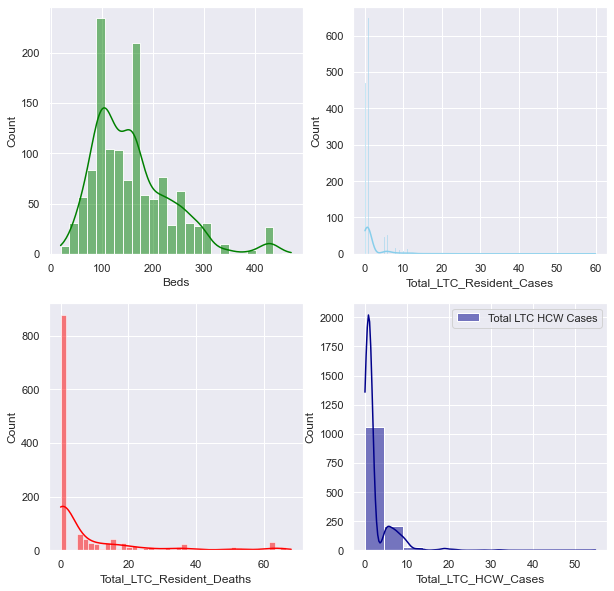

In [68]:
sns.set(style = 'darkgrid')

fig, axs = plt.subplots(2,2,figsize = (10,10))

sns.histplot(data = dataset, x = 'Beds', color = 'green', label = 'Beds', kde = True, ax = axs[0,0])
sns.histplot(data = dataset, x = 'Total_LTC_Resident_Cases', color = 'skyblue', label = 'Total LTC Resident Cases', kde = True, ax = axs[0,1])
sns.histplot(data = dataset, x = 'Total_LTC_Resident_Deaths', color = 'red', label = 'Total LTC Resident Deaths', kde = True, ax = axs[1,0])
sns.histplot(data = dataset, x = 'Total_LTC_HCW_Cases', color = 'darkblue', label = 'Total LTC HCW Cases', kde = True, ax = axs[1,1])


plt.legend()
plt.show()

Check distribution of the immunization related features

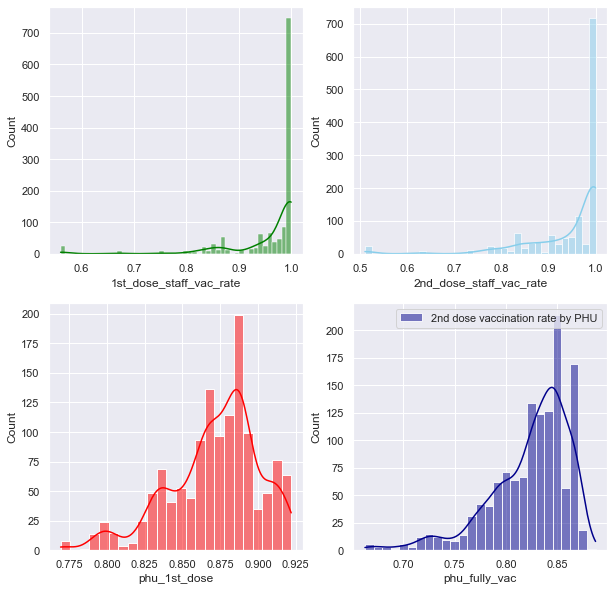

In [69]:
sns.set(style = 'darkgrid')

fig, axs = plt.subplots(2,2,figsize = (10,10))

sns.histplot(data = dataset, x = '1st_dose_staff_vac_rate', color = 'green', label = 'LTC Staff 1st dose', kde = True, ax = axs[0,0])
sns.histplot(data = dataset, x = '2nd_dose_staff_vac_rate', color = 'skyblue', label = 'LTC Staff 2nd dose', kde = True, ax = axs[0,1])
sns.histplot(data = dataset, x = 'phu_1st_dose', color = 'red', label = '1st dose vaccination rate by PHU', kde = True, ax = axs[1,0])
sns.histplot(data = dataset, x = 'phu_fully_vac', color = 'darkblue', label = '2nd dose vaccination rate by PHU', kde = True, ax = axs[1,1])


plt.legend()
plt.show()

Check distribution of the PHU COVID-19 cases related features

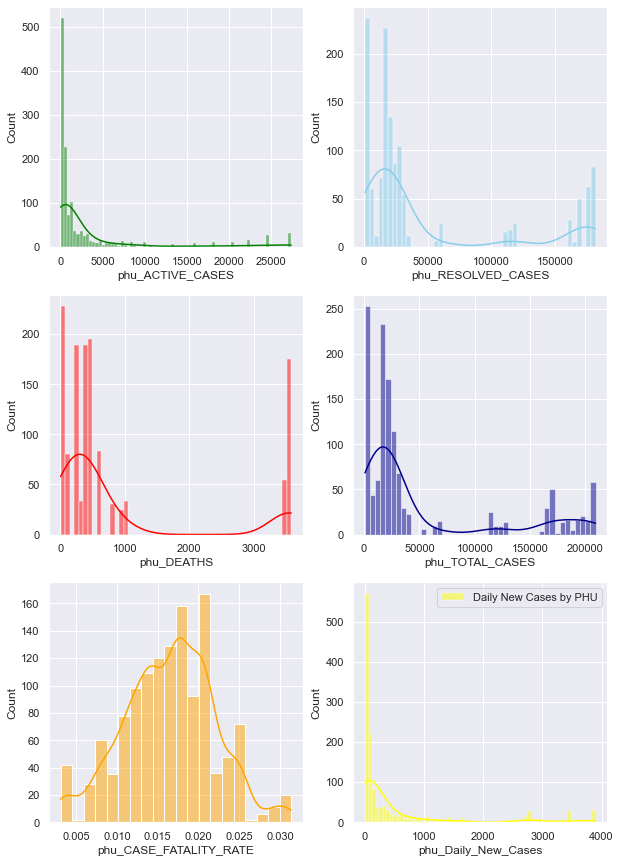

In [70]:
sns.set(style = 'darkgrid')

fig, axs = plt.subplots(3,2,figsize = (10,15))

sns.histplot(data = dataset, x = 'phu_ACTIVE_CASES', color = 'green', label = 'Active Cases by PHU', kde = True, ax = axs[0,0])
sns.histplot(data = dataset, x = 'phu_RESOLVED_CASES', color = 'skyblue', label = 'Resolved Cases by PHU', kde = True, ax = axs[0,1])
sns.histplot(data = dataset, x = 'phu_DEATHS', color = 'red', label = 'Deaths by PHU', kde = True, ax = axs[1,0])
sns.histplot(data = dataset, x = 'phu_TOTAL_CASES', color = 'darkblue', label = 'Total Cases by PHU', kde = True, ax = axs[1,1])
sns.histplot(data = dataset, x = 'phu_CASE_FATALITY_RATE', color = 'orange', label = 'Case Fatality Rate by PHU', kde = True, ax = axs[2,0])
sns.histplot(data = dataset, x = 'phu_Daily_New_Cases', color = 'yellow', label = 'Daily New Cases by PHU', kde = True, ax = axs[2,1])



plt.legend()
plt.show()

#### Correlation matrix

In [71]:
corr = dataset.corr()
corr

,Beds,Total_LTC_Resident_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Cases,1st_dose_staff_vac_rate,2nd_dose_staff_vac_rate,phu_ACTIVE_CASES,phu_RESOLVED_CASES,phu_DEATHS,phu_TOTAL_CASES,phu_CASE_FATALITY_RATE,phu_Daily_New_Cases,phu_1st_dose,phu_fully_vac,LTC_Mortality_Rate
Beds,1.000000,-0.003455,0.327566,0.134075,0.077931,0.063001,0.151779,0.143882,0.144261,0.148541,-0.051188,0.153651,0.148639,0.117854,0.158690
Total_LTC_Resident_Cases,-0.003455,1.000000,-0.056223,0.559886,-0.051104,-0.045605,0.115242,0.050480,0.051453,0.057997,0.036048,0.113974,0.027559,0.019105,-0.037987
Total_LTC_Resident_Deaths,0.327566,-0.056223,1.000000,-0.026328,0.074207,0.057731,0.310097,0.396624,0.422089,0.399189,0.231700,0.318268,0.027673,0.033386,0.920015
Total_LTC_HCW_Cases,0.134075,0.559886,-0.026328,1.000000,0.018236,0.046568,0.406996,0.250631,0.244725,0.272280,-0.051953,0.404665,0.105643,0.106691,-0.044328
1st_dose_staff_vac_rate,0.077931,-0.051104,0.074207,0.018236,1.000000,0.977070,0.176687,-0.180187,-0.203369,-0.151217,-0.240507,0.193524,0.569959,0.647257,0.085371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phu_CASE_FATALITY_RATE,-0.051188,0.036048,0.231700,-0.051953,-0.240507,-0.293758,-0.009547,0.116616,0.227148,0.107812,1.000000,-0.017341,-0.233080,-0.251812,0.213294
phu_Daily_New_Cases,0.153651,0.113974,0.318268,0.404665,0.193524,0.230074,0.988202,0.692438,0.678053,0.739319,-0.017341,1.000000,0.294231,0.304507,0.334838
phu_1st_dose,0.148639,0.027559,0.027673,0.105643,0.569959,0.603658,0.278214,-0.045294,-0.081529,-0.015825,-0.233080,0.294231,1.000000,0.957792,0.069209
phu_fully_vac,0.117854,0.019105,0.033386,0.106691,0.647257,0.687298,0.286687,-0.021688,-0.054784,0.006987,-0.251812,0.304507,0.957792,1.000000,0.077815


Heatmap

<AxesSubplot:>

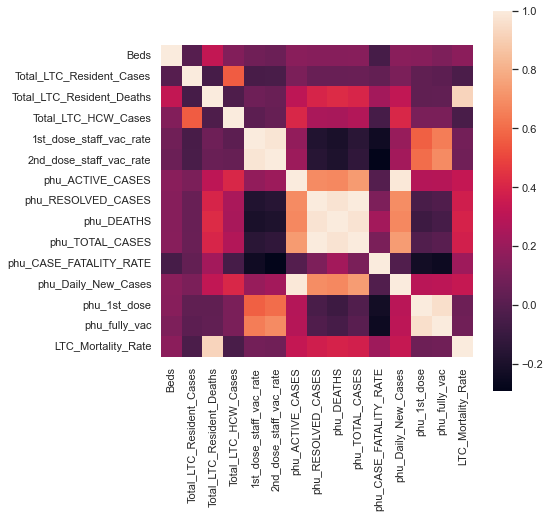

In [72]:
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(corr, square = True, xticklabels=corr.columns, yticklabels=corr.columns)

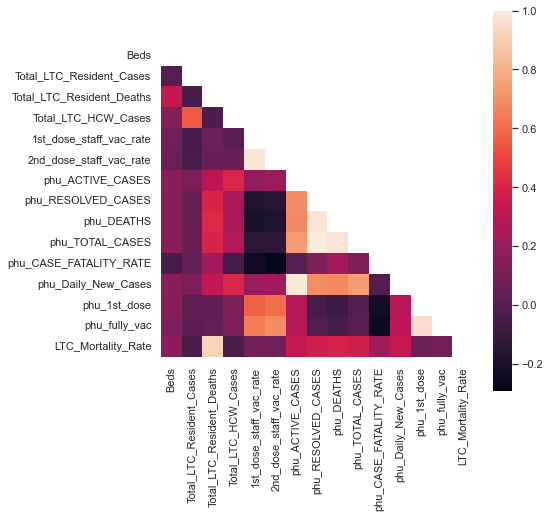

In [73]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize =(7,7))
    ax = sns.heatmap(corr, mask=mask, vmax = 1, square = True)

#### scatter plot grid

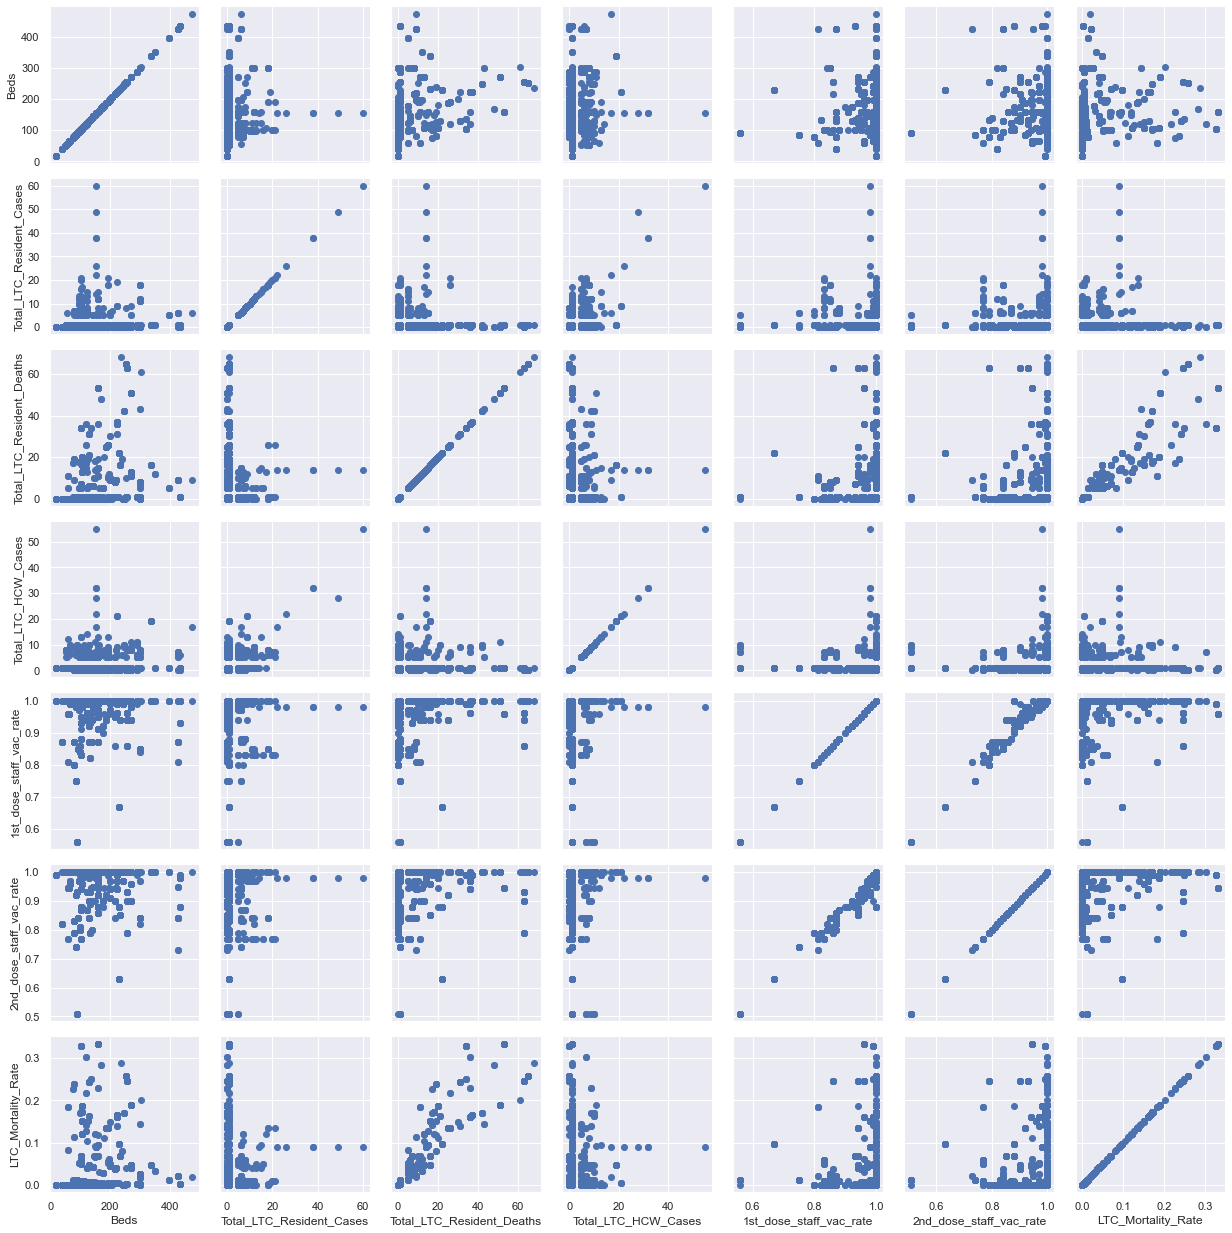

In [74]:
# columns of LTC data
dataset_ltc = dataset[['Beds', 'Total_LTC_Resident_Cases','Total_LTC_Resident_Deaths', 'Total_LTC_HCW_Cases',
                       '1st_dose_staff_vac_rate', '2nd_dose_staff_vac_rate', 'LTC_Mortality_Rate']]
ltc = sns.PairGrid(dataset_ltc)
ltc.map(plt.scatter);

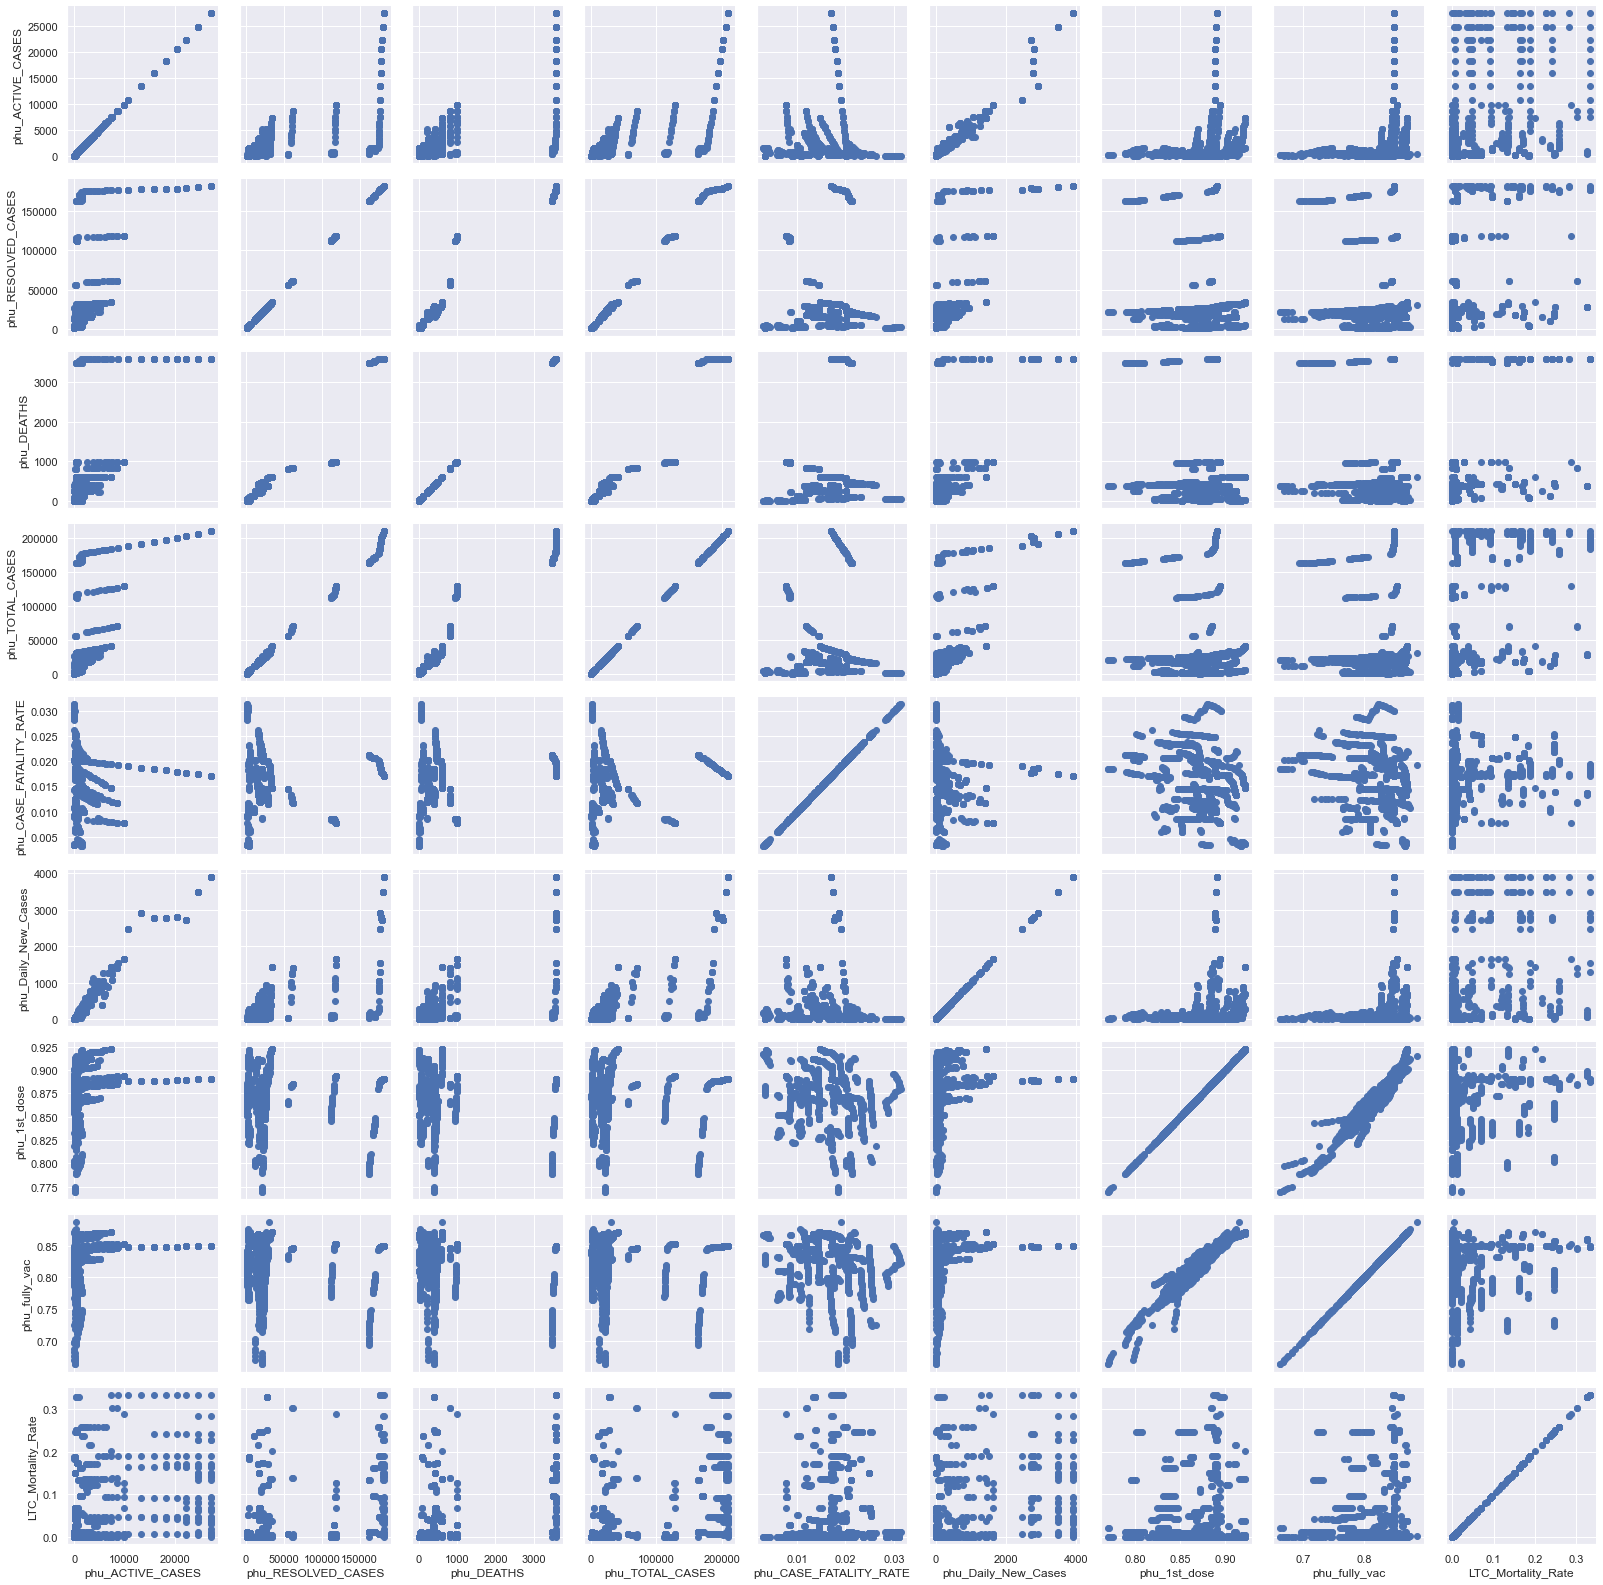

In [75]:
# columns of PHU data
dataset_phu = dataset[['phu_ACTIVE_CASES', 'phu_RESOLVED_CASES', 'phu_DEATHS',
                       'phu_TOTAL_CASES', 'phu_CASE_FATALITY_RATE', 'phu_Daily_New_Cases',
                       'phu_1st_dose', 'phu_fully_vac',  'LTC_Mortality_Rate']]
phu = sns.PairGrid(dataset_phu)
phu.map(plt.scatter);